In [1]:
import torch
import glob

In [2]:
model = torch.hub.load('/home/van/Desktop/yolov5', 'custom', '/home/van/catkin_ws/src/ros_yolov5/weights/sciroc2021_ep1.pt', source='local')
# model = torch.hub.load('/home/van/Desktop/yolov5', 'custom', '/home/van/Desktop/yolov5/gazebo_cola_dataset_yolov5/best.pt', source='local')

YOLOv5 🚀 v5.0-358-g3e7c59a torch 1.8.2 CPU

Fusing layers... 
Model Summary: 232 layers, 7276185 parameters, 0 gradients
Adding AutoShape... 


In [3]:
model.conf = 0.4  # confidence threshold (0-1)
# model.iou = 0.45  # NMS IoU threshold (0-1)
# model.classes = None  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs

In [4]:
path = '/home/van/Desktop/yolov5/gazebo_cola_dataset_yolov5/test/images/*.jpg'
imgs = glob.glob(path)

results = model(imgs, size=416)

In [5]:
results.print()

image 1/7: 416x416 (no detections)
image 2/7: 416x416 1 estathe
image 3/7: 416x416 (no detections)
image 4/7: 416x416 (no detections)
image 5/7: 416x416 (no detections)
image 6/7: 416x416 (no detections)
image 7/7: 416x416 1 estathe
Speed: 23.1ms pre-process, 386.4ms inference, 1.2ms NMS per image at shape (7, 3, 416, 416)


In [12]:
results.print()

image 1/7: 416x416 1 coca_cola
image 2/7: 416x416 1 coca_cola
image 3/7: 416x416 1 coca_cola
image 4/7: 416x416 1 coca_cola
image 5/7: 416x416 1 coca_cola
image 6/7: 416x416 (no detections)
image 7/7: 416x416 1 coca_cola
Speed: 9.9ms pre-process, 260.1ms inference, 0.8ms NMS per image at shape (7, 3, 640, 640)


In [14]:
results.print()

image 1/7: 416x416 1 coca_cola
image 2/7: 416x416 1 coca_cola
image 3/7: 416x416 1 coca_cola
image 4/7: 416x416 1 coca_cola
image 5/7: 416x416 1 coca_cola
image 6/7: 416x416 1 coca_cola
image 7/7: 416x416 1 coca_cola
Speed: 6.6ms pre-process, 110.8ms inference, 0.8ms NMS per image at shape (7, 3, 416, 416)


In [15]:
results.show()

In [4]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
img = cv2.imread('gazebo_cola_dataset_yolov5/test/images/default_gzclient_camera-1--2021-07-11T15_36_53-170999_jpg.rf.e360f7aad15e6565dde31c9f6de58e44.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
np.get

AttributeError: module 'numpy' has no attribute 'getbuffer'

In [32]:
print(img.shape)
# results = model

(416, 416, 3)


In [5]:
import rospy
import numpy as np

topicmanager initialized


In [6]:
from sensor_msgs.msg import Image

In [7]:
from std_msgs.msg import String, UInt8MultiArray, UInt8, Byte, UInt32

In [8]:
rospy.init_node('juyter_node')

In [9]:
pub = rospy.Publisher('jupyter_image', Image, queue_size=1, latch=True)

In [10]:
import json

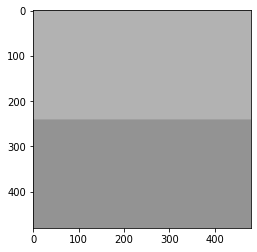

In [21]:
def callback(msg):
    names = model.names
    
    # Hack for getting image from image message without cvbridge
    img = np.frombuffer(msg.data, dtype=np.uint8)
    print(img.shape)
    img = img.reshape((msg.height, msg.width, 3))
    
#     sub.unregister()    
    
    # crop edges from 640x480 to 480x480
    img = img[:,80:560,:]
    print(img.dtype)
    results = model(img, size=480)

    detections = results.tolist()[0].xyxy

    if len(detections>0):
        for detection in detections:
            startx, starty, endx, endy, _, cls = detection.numpy().astype('int')
            conf = float(detection[4])
            
            cv2.rectangle(img,(startx,starty),(endx,endy),(255,0,0),2)
            cv2.putText(img,f'{names[cls]}: {conf:.2f}',(startx,starty-10),0,0.5,(255,0,0))
    
    cv2.imwrite('test_detections.jpg', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    img_msg = Image(height=480, width=480, encoding='rgb8', is_bigendian=0, step=1440, data=img.flatten().tobytes())
#     print(type(img_msg.data))
    pub.publish(img_msg)
    plt.imshow(img)

In [22]:
sub = rospy.Subscriber('/camera/rgb/image_raw', Image, callback=callback, queue_size=1)

(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,)
uint8
(921600,

1440

In [13]:
sub.unregister()

In [45]:
results = model('test_img.jpeg')
results.tolist()[0].xyxy

tensor([], size=(0, 6))

In [50]:
model.conf=0.4
model.iou=0.45
results = model('test_img.jpeg', size=480)
result = results.tolist()[0]
print(result.xyxy)


tensor([[420.00906, 187.03108, 496.42215, 343.46667,   0.82183,   4.00000],
        [300.88013, 189.60005, 373.39587, 330.96606,   0.61825,   8.00000],
        [302.73111, 183.93933, 373.94601, 338.45569,   0.59392,   6.00000]])


In [ ]:
img = results.imgs[0]
for 
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [74]:
model.names

['beer',
 'bifrutas_tropical_can',
 'buiscuits_pack',
 'cocacola',
 'estathe',
 'fanta',
 'peroni',
 'plastic_cup',
 'pringles1',
 'pringles2',
 'sprite',
 'tea_box']

In [51]:
results.tolist()

NameError: name 'results' is not defined

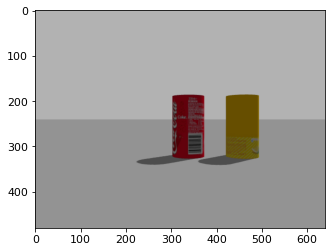

In [16]:
plt.imshow(results.imgs[0])

In [113]:
results.imgs[0].tobytes()

b'\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\x

In [14]:
from collections import Counter

In [20]:
cnt = Counter(['cocacola', 'cocacola'])

In [22]:
img.tobytes()

b'\x82E2\x86I6\x8aM8\x8bO7\x87M5\x86M2\x87N1\x89P3\x84M/\x88Q3\x8aT8\x89S7\x84N6\x7fI1|E0|E1vA/\x83I3\x83A\x1f\x89J\'\x83U>zTA}O?f:-sKI\x9a{\x81\x83n\x7fdJUl=7w?.\x82R<\x84T>\x84O=}F2zC/\x82K6\x86P8\x83M5\x82L2\x86P6\x82L2\x81K1\x80J2~H0}F1\x7fH3\x83K:\x87P<~K0sE+kF4sXM\xa1\x93\x90\xbc\xb8\xb9\xab\xaa\xb0\xaf\xb2\xb9\xb1\xb2\xb7\xb2\xb1\xb6\xb3\xb1\xb4\xb5\xb1\xb2\xb5\xb1\xb2\xb5\xb1\xb2\xb3\xb1\xb6\xb3\xb1\xb4\xb2\xb2\xb4\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\xb2\x

In [27]:
UInt8MultiArray(data=[1,2,3])

layout: 
  dim: []
  data_offset: 0
data: [1, 2, 3]

data: 123

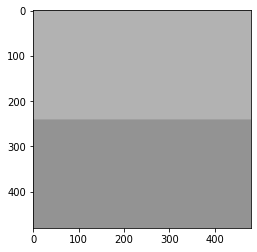